##### Develop multi class classifier using deep multilayer perceptron (Keras/tensorflow/pytorch) for MNIST hand recognition dataset and CIFAR10. Fine the parameters for better accuracy. Analyze the model accuracy and generate classification report. Plot accuracy and loss graph.
##### -> Develop application with GUI to upload input to the system.
##### -> Test the model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils import np_utils

In [2]:
np.random.seed(9)

# user inputs
nb_epoch = 25
num_classes = 10
batch_size = 128
train_size = 60000
test_size = 10000
v_length = 784

In [3]:
# split the mnist data into train and test
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()
print("[INFO] train data shape: {}".format(trainData.shape))
print("[INFO] test data shape: {}".format(testData.shape))
print("[INFO] train samples: {}".format(trainData.shape[0]))
print("[INFO] test samples: {}".format(testData.shape[0]))

[INFO] train data shape: (60000, 28, 28)
[INFO] test data shape: (10000, 28, 28)
[INFO] train samples: 60000
[INFO] test samples: 10000


In [4]:
# reshape the dataset
trainData = trainData.reshape(train_size, v_length)
testData = testData.reshape(test_size, v_length)
trainData = trainData.astype("float32")
testData = testData.astype("float32")
trainData /= 255
testData /= 255

In [5]:
print("[INFO] train data shape: {}".format(trainData.shape))
print("[INFO] test data shape: {}".format(testData.shape))
print("[INFO] train samples: {}".format(trainData.shape[0]))
print("[INFO] test samples: {}".format(testData.shape[0]))

[INFO] train data shape: (60000, 784)
[INFO] test data shape: (10000, 784)
[INFO] train samples: 60000
[INFO] test samples: 10000


In [6]:
# convert class vectors to binary class matrices --> one-hot encoding
mTrainLabels = np_utils.to_categorical(trainLabels, num_classes)
mTestLabels = np_utils.to_categorical(testLabels, num_classes)

In [7]:
# create the model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [8]:
# compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# fit the model
history = model.fit(trainData, mTrainLabels, validation_data=(testData, mTestLabels), batch_size=batch_size, verbose=2)


469/469 - 7s - loss: 0.2614 - accuracy: 0.9214 - val_loss: 0.1093 - val_accuracy: 0.9636 - 7s/epoch - 16ms/step


In [11]:

# print the history keys
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [12]:

# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)


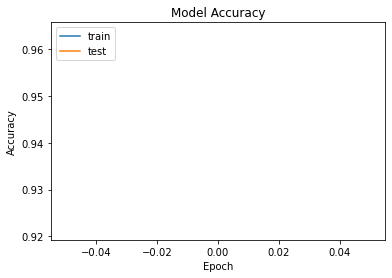

In [17]:

# history plot for accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()


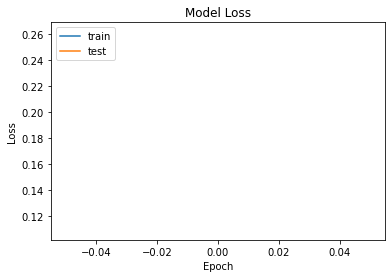

In [18]:

# history plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [19]:
# print the results
print("[INFO] test score - {}".format(scores[0]))
print("[INFO] test accuracy - {}".format(scores[1]))

[INFO] test score - 0.10933786630630493
[INFO] test accuracy - 0.9635999798774719
